In [1]:
import pandas as pd
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

In [3]:
df_wine.columns = ["Class label", 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
                  'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', '0D280/0D315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,0D280/0D315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [21]:
from sklearn.cross_validation import train_test_split

X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [23]:
#공분산행렬을 이용한 Eigendcomposition
import numpy as np

cov_mat = np.cov(X_train_std.T)
#T는 mat의 T를 의미

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print("\nEigenvalues \n%s" % eigen_vals)


Eigenvalues 
[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


In [24]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)]
#어떤 eigen이 높은지.

cum_var_exp = np.cumsum(var_exp)

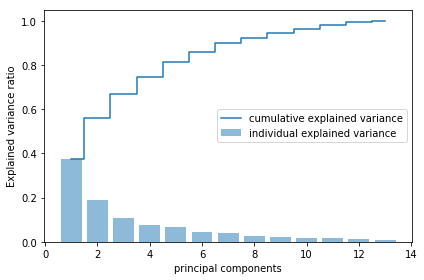

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(1, 14), var_exp, alpha=0.5, align = 'center',
       label = 'individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
        label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel("principal components")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [26]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
#주성분축으로 와인데이터 변환


eigen_pairs.sort(reverse=True)
#내림차순


w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]))
#투영행렬W : 변수를 2차우너으로 축소

In [27]:
X_train_std[0].dot(w)
#w와 X_train_std 내적곱

X_train_pca = X_train_std.dot(w)

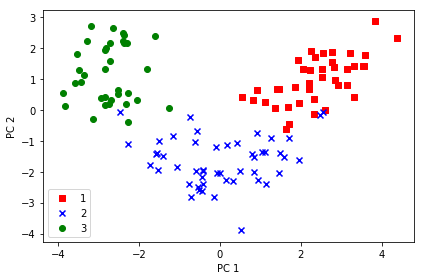

In [29]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l,0],
               X_train_pca[y_train==l,1],
               c=c, label=l, marker=m)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [33]:
from sklearn.datasets import load_digits

digits = load_digits()
X_digits, y_digits = digits.data, digits.target

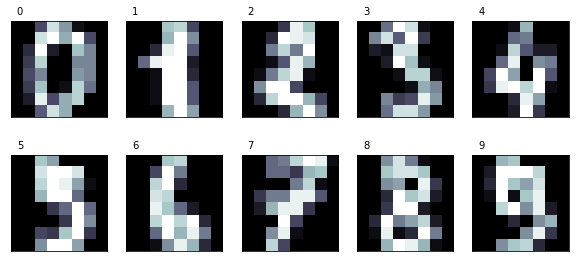

In [34]:
import matplotlib.pyplot as plt

n_row, n_col = 2,5

def print_digits(images, y , max_n = 10):
    fig = plt.figure(figsize = (2. * n_col, 2.26*n_row))
    i=0
    while i < max_n and i <images.shape[0]:
        p= fig.add_subplot(n_row, n_col, i+1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone, interpolation='nearest')
        p.text(0,-1,str(y[i]))
        i= i+1
        
print_digits(digits.images, digits.target, max_n=10)

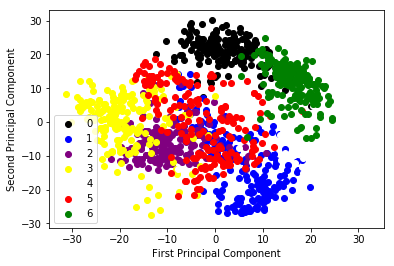

In [35]:
from sklearn.decomposition import PCA

estimator= PCA(n_components=10)
X_pca = estimator.fit_transform(X_digits)

def plot_pca_scatter():
    colors= ['black', 'blue','purple','yellow','white', 'red', 'green']
    for i in range(len(colors)):
        px = X_pca[:,0][y_digits ==i]
        py = X_pca[:,1][y_digits ==i]
        plt.scatter(px, py, c=colors[i])
        
    plt.legend(digits.target_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    
plot_pca_scatter()

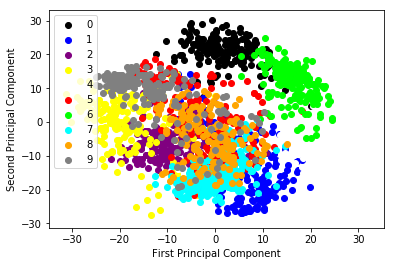

In [36]:
from sklearn.decomposition import PCA

estimator= PCA(n_components=10)
X_pca = estimator.fit_transform(X_digits)

def plot_pca_scatter():
    colors= ['black', 'blue','purple','yellow','white', 'red', 'lime','cyan','orange','gray']
    for i in range(len(colors)):
        px = X_pca[:,0][y_digits ==i]
        py = X_pca[:,1][y_digits ==i]
        plt.scatter(px, py, c=colors[i])
        
    plt.legend(digits.target_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    
plot_pca_scatter()

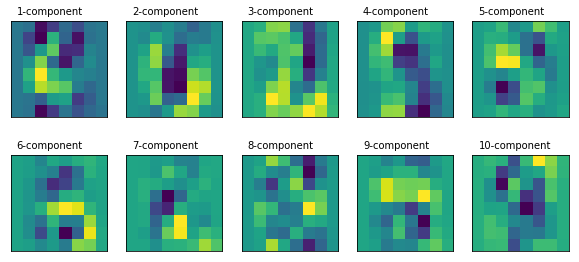

In [37]:
def print_pca_components(images, n_col, n_row):
    plt.figure(figsize=(2. *n_col, 2.26*n_row))
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(comp.reshape((8,8)), interpolation='nearest')
        plt.text(0,-1,str(i+1)+'-component')
        plt.xticks(())
        plt.yticks(())
n_components = n_row * n_col
print_pca_components(estimator.components_[:n_components], n_col, n_row)

In [38]:
a,b=np.arange(10).reshape((5,2)),range(5)
train_test_split(a,b)

[array([[4, 5],
        [6, 7],
        [2, 3]]), array([[8, 9],
        [0, 1]]), [2, 3, 1], [4, 0]]

In [39]:
a,b=np.arange(10).reshape((5,2)),range(5)
train_test_split(a,b,random_state=0)

[array([[2, 3],
        [6, 7],
        [8, 9]]), array([[4, 5],
        [0, 1]]), [1, 3, 4], [2, 0]]